Q-3. Consider the ‘Blood Pressure Before’ and ‘Blood Pressure After’ columns from the data and calculate the following 



https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_ 


a. Measure the dispersion in both and interpret the results. 

b. Calculate mean and 5% confidence interval and plot it in a graph 

c. Calculate the Mean absolute deviation and Standard deviation and interpret the results. 

d. Calculate the correlation coefficient and check the significance of it at 1% level of significance. 

In [15]:
import numpy as np
import  pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr

In [6]:
df = pd.read_csv('https://drive.google.com/uc?id=1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y')
df

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
...,...,...,...
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135


In [14]:


# Calculate range
range_before = np.max(df[ ' Blood Pressure Before (mmHg)']) - np.min(df[' Blood Pressure Before (mmHg)'])
range_after = np.max(df[' Blood Pressure After (mmHg)']) - np.min(df[' Blood Pressure After (mmHg)'])

# Calculate interquartile range
iqr_before = np.percentile(df[' Blood Pressure Before (mmHg)'], 75) - np.percentile(df[' Blood Pressure Before (mmHg)'], 25)
iqr_after = np.percentile(df[' Blood Pressure After (mmHg)'], 75) - np.percentile(df[' Blood Pressure After (mmHg)'], 25)

print("Dispersion in Blood Pressure Before (mmHg):")
print("Range:", range_before)
print("IQR:", iqr_before)

print("\nDispersion in Blood Pressure After (mmHg):")
print("Range:", range_after)
print("IQR:", iqr_after)


Dispersion in Blood Pressure Before (mmHg):
Range: 28
IQR: 11.25

Dispersion in Blood Pressure After (mmHg):
Range: 23
IQR: 12.0


In [12]:
np.min(df[' Blood Pressure Before (mmHg)'])

120

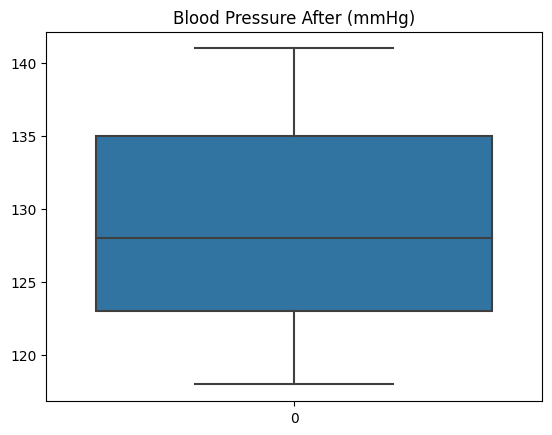

In [16]:
sns.boxplot(df[' Blood Pressure After (mmHg)'])
plt.title('Blood Pressure After (mmHg)')
plt.show()

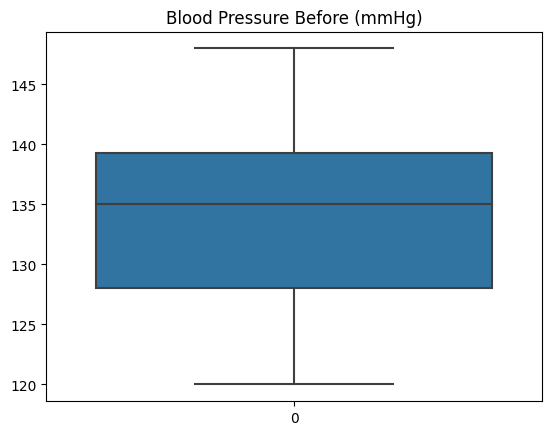

In [21]:
sns.boxplot(df[' Blood Pressure Before (mmHg)'])
plt.title(' Blood Pressure Before (mmHg)')
plt.show()

b. To calculate the mean and 5% confidence interval and plot it in a graph, you can use the mean and t.interval() function from the scipy.stats module.

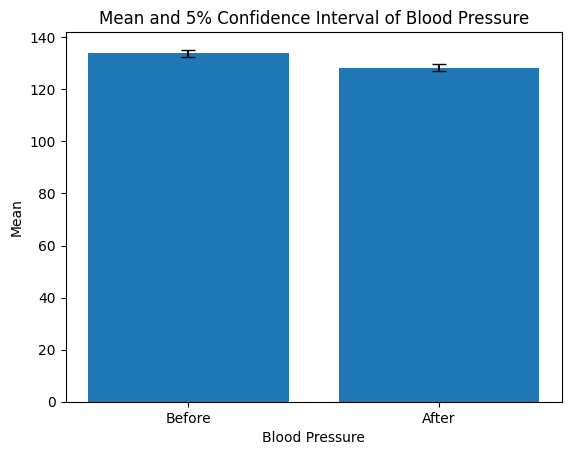

In [32]:


# Calculate mean and confidence interval
mean_before = np.mean(df[' Blood Pressure Before (mmHg)'])
ci_before = stats.t.interval(0.95, len(df[' Blood Pressure Before (mmHg)']) - 1, loc=mean_before, scale=stats.sem(df[' Blood Pressure Before (mmHg)']))

mean_after = np.mean(df[' Blood Pressure After (mmHg)'])
ci_after = stats.t.interval(0.95, len(df[' Blood Pressure After (mmHg)']) - 1, loc=mean_after, scale=stats.sem(df[' Blood Pressure After (mmHg)']))

# Plot mean and confidence interval
x = ['Before', 'After']
y = [mean_before, mean_after]
y_err = [(mean_before - ci_before[0]), (mean_after - ci_after[0])]

plt.bar(x, y, yerr=y_err, capsize=5)
plt.xlabel('Blood Pressure')
plt.ylabel('Mean')
plt.title('Mean and 5% Confidence Interval of Blood Pressure')
plt.show()

c. To calculate the Mean Absolute Deviation (MAD) and Standard Deviation (SD) and interpret the results:


In [36]:
# Calculate Mean Absolute Deviation
mad_before = np.mean(np.abs(df[' Blood Pressure Before (mmHg)'] - np.mean(df[' Blood Pressure Before (mmHg)'])))
mad_after = np.mean(np.abs(df[' Blood Pressure After (mmHg)'] - np.mean(df[' Blood Pressure After (mmHg)'])))

# Calculate Standard Deviation
sd_before = np.std(df[' Blood Pressure Before (mmHg)'])
sd_after = np.std(df[' Blood Pressure After (mmHg)'])

print("Mean Absolute Deviation:")
print("Before:", mad_before)
print("After:", mad_after)

print("\nStandard Deviation:")
print("Before:", sd_before)
print("After:", sd_after)

Mean Absolute Deviation:
Before: 5.7118
After: 5.9

Standard Deviation:
Before: 6.56520372875054
After: 6.853495458523336


The Mean Absolute Deviation measures the average distance between each data point and the mean, providing a measure of the spread around the mean. 

The Standard Deviation measures the dispersion of the data points from the mean, 
indicating the average deviation of data points from the mean. Higher values of MAD and SD indicate greater variability or dispersion in the data.

d. To calculate the correlation coefficient and check its significance at a 1% level of significance, you can use the pearsonr() function from the scipy.stats module.


In [39]:
# Calculate correlation coefficient and p-value
corr_coef, p_value = pearsonr(df[' Blood Pressure Before (mmHg)'], df[' Blood Pressure After (mmHg)'])

# Check significance at 1% level
if p_value < 0.01:
    print("Correlation is significant at the 1% level.")
else:
    print("Correlation is not significant at the 1% level.")

print("Correlation Coefficient:", corr_coef)

Correlation is significant at the 1% level.
Correlation Coefficient: 0.9779485966556017



Interpretation: The correlation coefficient measures the strength and direction of the linear relationship between the blood pressure before and after taking the drug. The p-value indicates the significance of the correlation coefficient. If the p-value is less than the chosen significance level (in this case, 0.01), it suggests a significant correlation.